In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.stats.multicomp as ml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read in data file, make it into a dataframe
f=pd.read_csv("../deception_data/n151_2017/liwc_au.csv")

In [ ]:
# keep only the AU's, filename, and question
keep_col = ['Filename','question','AU01_r','AU02_r','AU04_r','AU05_r','AU06_r','AU07_r','AU09_r','AU10_r','AU12_r','AU14_r','AU15_r','AU17_r','AU20_r','AU23_r','AU25_r','AU26_r','AU45_r']
new_f = f[keep_col]
new_f.to_csv("old_data_au.csv", index=False)

In [ ]:
## Make a subset of the data that includes only the baseline questions
df = new_f[(new_f['question'] < 5)]

In [ ]:
print(df)

In [ ]:
# Function to label each  question based on mental state
def label_question (row):
   if row['question'] == 0 :
      return 'ambiguous'
   if row['question'] == 1 :
      return 'baseline_truth'
   if row['question'] == 2 :
      return 'memory_recall'
   if row['question'] == 3 :
      return 'cognitive'
   if row['question'] == 4 :
      return 'uncomfortable'
   return 'Other'

In [ ]:
df['question_label'] = df.apply(lambda row: label_question (row),axis=1)

In [ ]:
df.to_csv("baseline_questions.csv", index=False)

In [ ]:
df

In [ ]:
# Partition the data based on question label 
amb = df[(df['question_label'] == 'ambiguous')]
bt = df[(df['question_label'] == 'baseline_truth')]
mr = df[(df['question_label'] == 'memory_recall')]
cog = df[(df['question_label'] == 'cognitive')]
unc = df[(df['question_label'] == 'uncomfortable')]

df2 = pd.DataFrame([])
df3 = pd.DataFrame([])

# display average au levels for each type of baseline question
for d in [amb,bt,mr,cog,unc]:
    print('----')
    print(d.mean())
    df2 = df2.append(d.mean(), ignore_index=True)
    df3 = df3.append(d, ignore_index=True)

In [ ]:
print(amb)

In [ ]:
# Use the ANOVA one way test for each AU level
for c in df3.iloc[:,2:-1]:
    print(c)
    lm = ols('df3[c] ~ question',data=df3).fit()

    table = sm.stats.anova_lm(lm, typ=1) # Type 2 ANOVA DataFrame
    print(table)
    print('-------\n')

In [ ]:
print(df2)

In [ ]:
ambAU01 = amb['AU01_r']
print(ambAU01)

In [ ]:
# Use the ANOVA one way test for each AU level

for c in df3.iloc[:,2:-1]:
    print(c)
    F, p = stats.f_oneway(amb[c],bt[c],mr[c],cog[c],unc[c])
    print(F,p)
    print('-------\n')
    
                     


In [ ]:
df3

In [ ]:
# Now that we have a p-value for AU05 of ~ .06 use Tukey's test to see where
# the significance is coming from

mc = MultiComparison(df3['AU05_r'],df3['question_label'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)


In [ ]:
# Now that we have a p-value for AU25 of < .05 use Tukey's test to see where
# the significance is coming from

mc = MultiComparison(df3['AU25_r'],df3['question_label'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

In [ ]:
df2

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

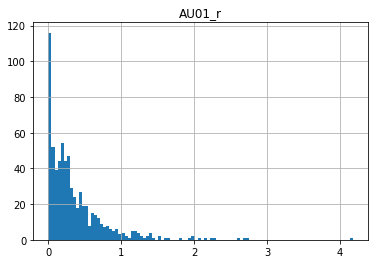

In [146]:
# Plot histograms for distributions of AU levels
for c in df3.iloc[:,2:-1]:
    df3.hist(column = df3[c].name,bins=100)
    


In [ ]:
# Plot average AU level for each AU for each question 
for c in df2.iloc[:,:-1]:
    au = pd.DataFrame([])
    au = df2.filter([c],axis=1)
    au.plot.bar()
  
 
